Vagner Sanches Vasconcelos
- Aula 13

UTILIZANDO OS DADOS DISPONIBILIZADOS NO ARQUIVO ((DATASET DATASET:: SINAISVITAIS003 100DIAS DV2 XXXX.TXT , ONDE xxxx INDICA O PRIMEIRO DÍGITO DO SEU RA – DA DIREITA PARA A ESQUERDA)ESQUERDA),, APRESENTE UMA PROPOSTA DE MINERAÇÃO DE DADOS UTILIZANDO OS ELEMENTOS DE ESTATÍSTICAS DESENVOLVIDOS EM CLASSE.
UMA DAS PRIMEIRAS ETAPAS DA MINERAÇÃO DE DADOS É A PREPARAÇÃO DA BASE DE DADOS. OBSERVE NOS GRÁFICOS AO LADO QUE OS DADOS POSSUEM ALGUMAS ANOMALIAS OU VALORES ESPÚRIOS OU RUÍDOS, RUÍDOS, QUE DEVEM SER REMOVIDAS. OS PARÂMETROS MÁXIMOS (EM REPOUSO) PARA O BATIMENTO CARDÍACO, A PRESSÃO PRESSÃO ARTERIAL E A TEMPERATURA CORPORAL SÃO OS SEGUINTES:
0 <= BATIMENTO CARDÍACO <100
0 <= PRESSÃO ARTERIAL < 20
0 <= TEMPERATURA CORPORAL < 40

1) DESENVOLVER UM PROCEDIMENTO PARA EFETUAR A PREPARAÇÃO DOS DADOS – GERALMENTE OS VALORES FORA DA FAIXA DE ANÁLISE PADRÃO SÃO “REMOVIDOS”/”SUBSTITUÍDOS” POR UM VALOR MÉDIO ENTRE O VALOR ANTECESSOR E POSTERIOR. DESENVOLVER O SOFTWARE EM PYTHON.

In [1]:
# Leitura dos dados
import csv
dadosRaw=[]
path = "sinaisvitais003 100dias DV2 RAxxx5.txt"
with open(path,'r',newline='') as ARQUIVO:
    d = csv.reader(ARQUIVO)
    dd=list(d)
    for i in range(0,len(dd)):
        p=dd[i][0]  
        palavras=p.split("\t")
        dadosRaw.append({"HORA":palavras[0],
                      "BATIMENTO":palavras[1],
                      "PRESSAO":palavras[2],
                      "TEMPERATURA":palavras[3]}
                    )

In [2]:
# Acrescentando a coluna DIA
import math
for i in range(len(dadosRaw)):
    dadosRaw[i].update({'DIA':math.ceil((i+1)/24)})

In [3]:
# Convertendo os dados para um dataframe Pandas
# Importando pacote pandas
import pandas as pd
# Convertendo dados brutos em um DataFrame Pandas
dadosRawDF=pd.DataFrame(dadosRaw)

In [4]:
dadosRawDF.head(2)

,HORA,BATIMENTO,PRESSAO,TEMPERATURA,DIA
0,0,66.53589838486225,10.267949192431123,36.7142586191619,1
1,1,66.93582222752408,10.467911113762044,36.6350564932263,1


In [5]:
# Verificando o tipo de cada uma das variáveis
dadosRawDF.dtypes

HORA           object
BATIMENTO      object
PRESSAO        object
TEMPERATURA    object
DIA             int64
dtype: object

Todas as varíveis são do tipo *object* (sequencias de caracteres, podem ser números ou letras)

In [6]:
# Convertendo todos os tipos para float
import numpy as np
dadosRawDF=dadosRawDF.astype(np.float16)
dadosRawDF.dtypes

HORA           float16
BATIMENTO      float16
PRESSAO        float16
TEMPERATURA    float16
DIA            float16
dtype: object

In [7]:
# Converte a Hora para o tipo inteiro
#dadosDF['HORA']=dadosDF[['HORA']].apply(pd.to_datetime)
#pd.to_datetime(dadosDF['HORA'],format='%H.%f')
dadosRawDF['HORA']=dadosRawDF['HORA'].astype(int)
dadosRawDF.dtypes

HORA             int64
BATIMENTO      float16
PRESSAO        float16
TEMPERATURA    float16
DIA            float16
dtype: object

In [8]:
# Tranformando a coluna DIA no indice do dataframe 
dadosRawDFIndexDia=dadosRawDF.set_index('DIA')
# Ajustando a visualização para duas casas decimais
pd.set_option('display.precision',1)

In [9]:
dadosRawDFIndexDia.head(2)

,HORA,BATIMENTO,PRESSAO,TEMPERATURA
DIA,,,,
1.0,0,66.6,10.3,36.7
1.0,1,66.9,10.5,36.6


In [10]:
dadosRawDFIndexDia.tail(2)

,HORA,BATIMENTO,PRESSAO,TEMPERATURA
DIA,,,,
100.0,22,67.8,11.3,37.0
100.0,23,65.8,11.3,37.1


In [11]:
dadosRawDFIndexDia.head(1)

,HORA,BATIMENTO,PRESSAO,TEMPERATURA
DIA,,,,
1.0,0,66.6,10.3,36.7


In [12]:
# Verificando a quantidade de dados
len(dadosRawDFIndexDia)

2400

São 2400 registros, como cada registro é realizado em uma hora, ou seja, são 24 registros por dia, sendo assim, temos informações de 100 dias.

In [13]:
# Verificando se há algum dado fantante.
dadosRawDFIndexDia.count()

HORA           2400
BATIMENTO      2400
PRESSAO        2400
TEMPERATURA    2400
dtype: int64

Todas as 4 variáveis possuem os 2400 registros, portanto, não nehum dado faltante.

Como será a distribuição dos dados para a variável BATIMENTO?

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Distribuicao do batimento')

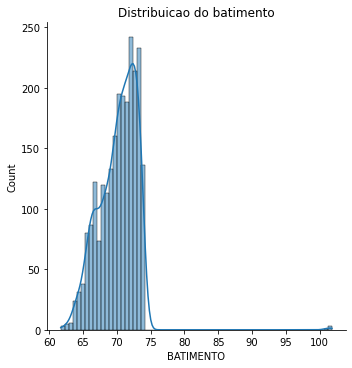

In [14]:
# Carregando bibliotecas
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
# Imprimindo o gráfico
sns.displot(dadosRawDFIndexDia.BATIMENTO, kde=True)
plt.title('Distribuicao do batimento')

A grande maioria das amostras estão entre 62 e 78 batimentos, contudo, existem pontos acima de 100 batimentos.
Vamos verificar se existem pontos fora da curva (outliers), utilizando o gráfico boxplot.
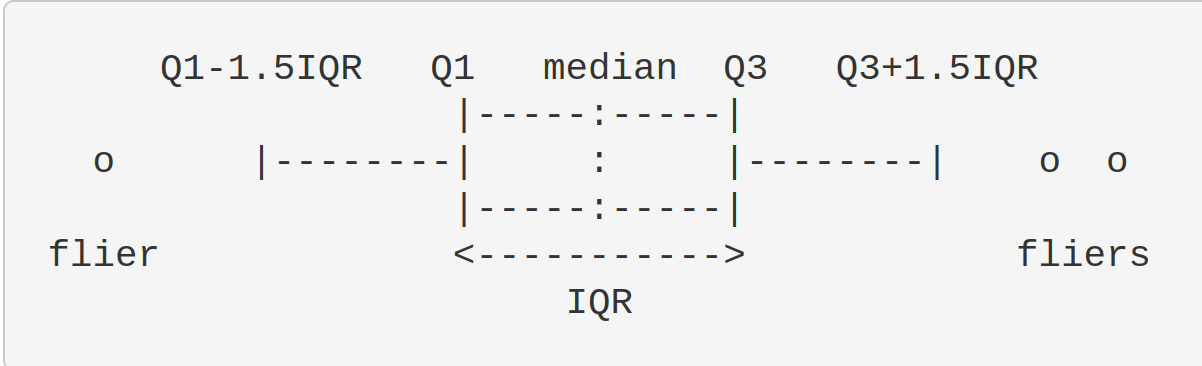

Text(0.5, 1.0, 'BoxPlot da variavel BATIMENTO')

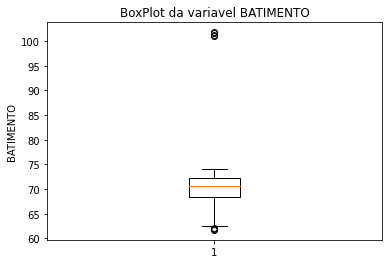

In [15]:
# Imprimindo um boxplot dos batimentos 
plt.boxplot([dadosRawDFIndexDia.BATIMENTO])
plt.ylabel("BATIMENTO")
plt.title('BoxPlot da variavel BATIMENTO')

Conforme boxplot, temos pontos fora da curva por volta de acima de 100 batimentos e de abaixo de 62 batimentos.  
Quantos pontos existem nestes intervalos?

In [16]:
# Acima de 100 batimentos 
len(dadosRawDFIndexDia[(dadosRawDFIndexDia.BATIMENTO >= 100)])

4

In [17]:
# Abaixo de 62 batimentos
len(dadosRawDFIndexDia[(dadosRawDFIndexDia.BATIMENTO <= 62)])

2

Segundo os especialistas, OS PARÂMETROS MÁXIMOS (EM REPOUSO) PARA O *BATIMENTO CARDÍACO* SÃO OS SEGUINTES:
- 0 <= BATIMENTO CARDÍACO <100


Vamos verificar os BATIMENTOS em função do DIA

<AxesSubplot:xlabel='DIA'>

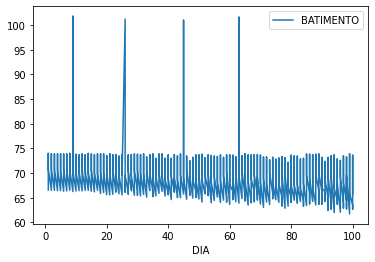

In [18]:
dadosRawDFIndexDia.plot(y='BATIMENTO',use_index=True)

Quais são exatamente estes dias que ocorreram outiliers nos batimentos?

In [19]:
indicesOutliersBatimento = dadosRawDFIndexDia[dadosRawDFIndexDia['BATIMENTO']>100 ].index
indicesOutliersBatimento

Float64Index([9.0, 26.0, 45.0, 63.0], dtype='float64', name='DIA')

In [20]:
dadosRawDFIndexDia[dadosRawDFIndexDia.BATIMENTO > 100]

,HORA,BATIMENTO,PRESSAO,TEMPERATURA
DIA,,,,
9.0,11,101.8,13.4,36.9
26.0,0,101.2,10.0,36.6
45.0,9,101.0,12.2,37.0
63.0,2,101.6,9.8,36.7


Se excluirmos o index 9 (DIA 9), estaremos excluindo não só a HORA 11, mas todos os 24 registros do DIA  9. A mesma lógica vale para os outros dias (26, 45 e 63).  
Vamos verificar estes pontos no dataframe original

In [21]:
dadosRawDF[dadosRawDF.BATIMENTO > 100]

,HORA,BATIMENTO,PRESSAO,TEMPERATURA,DIA
203,11,101.8,13.4,36.9,9.0
600,0,101.2,10.0,36.6,26.0
1065,9,101.0,12.2,37.0,45.0
1490,2,101.6,9.8,36.7,63.0


Assim, temos que excluir os indices: 203, 600, 1065 e 1490

In [22]:
indicesOutliersBatimento = dadosRawDF[dadosRawDF['BATIMENTO']>100 ].index
indicesOutliersBatimento

Int64Index([203, 600, 1065, 1490], dtype='int64')

Como será a distribuição dos dados para a variável PRESSAO?

Text(0.5, 1.0, 'Distribuicao do pressão')

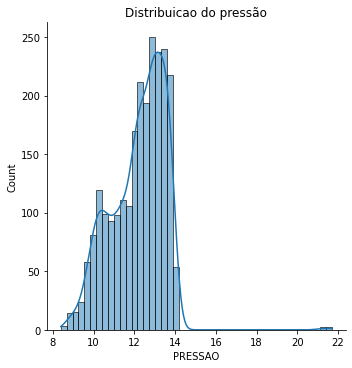

In [23]:
sns.displot(dadosRawDFIndexDia.PRESSAO, kde=True)
plt.title('Distribuicao do pressão')

Os valores de pressão estão predominantemente entre 8 e 14, sendo mais intenso na faixa entre 12 e 14, contudo, existem valores acima de 20. Vamos verificar se existem pontos fora da curva (outliers), utilizando o gráfico boxplot.

Text(0.5, 1.0, 'BoxPlot da variavel PRESSAO')

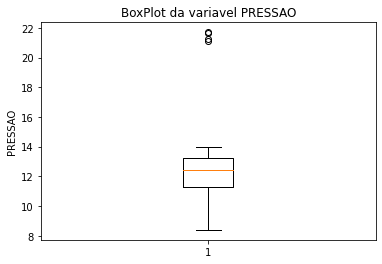

In [24]:
# Imprimindo um boxplot da pressão 
plt.boxplot([dadosRawDFIndexDia.PRESSAO])
plt.ylabel("PRESSAO")
plt.title('BoxPlot da variavel PRESSAO')

Conforme já notado no gráfico de distribuição, aqui se observa os outliers acima de 20.

In [25]:
# Pressão acima de 20 
len(dadosRawDFIndexDia[(dadosRawDFIndexDia.PRESSAO >= 20)])

4

Segundo os especialistas, OS PARÂMETROS MÁXIMOS (EM REPOUSO) PARA A PRESSÃO PRESSÃO ARTERIAL SÃO: 
- 0 <= PRESSÃO ARTERIAL < 20

Vamos verificar a PRESSAO em função dos DIA

<AxesSubplot:xlabel='DIA'>

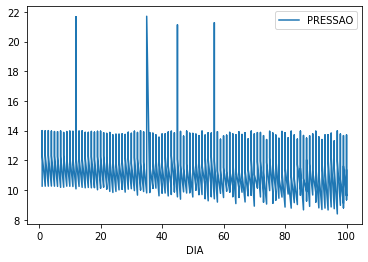

In [26]:
dadosRawDFIndexDia.plot(y='PRESSAO',use_index=True)

Quais os dias especificamente que ocorreram os outiliers na pressão?

In [27]:
indicesOutliersPressao = dadosRawDFIndexDia[ dadosRawDFIndexDia['PRESSAO'] > 20 ].index
indicesOutliersPressao

Float64Index([12.0, 35.0, 45.0, 57.0], dtype='float64', name='DIA')

Da mesma forma que para a variável BATIMENTO, não devemos excluir o dia inteiro, e sim, somente o ponto esfecifico destes dias, desta forma utilizaremos o dataframe original.

In [28]:
indicesOutliersPressao = dadosRawDF[ dadosRawDF['PRESSAO'] > 20 ].index
indicesOutliersPressao

Int64Index([277, 839, 1074, 1345], dtype='int64')

Assim, serão excluidos os índices acima.

Como será a distribuição dos dados para a variável TEMPERATURA?

Text(0.5, 1.0, 'Distribuicao da temperatura')

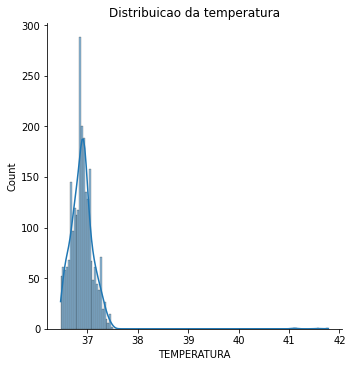

In [29]:
sns.displot(dadosRawDFIndexDia.TEMPERATURA, kde=True)
plt.title('Distribuicao da temperatura')

A temperatura esta concentrada entre 36,5 e 37,6ºC. Cntudo, parece existir pontos acima de 41ºC. Vamos verificar se existem pontos fora da curva (outliers), utilizando o gráfico boxplot.

Text(0.5, 1.0, 'BoxPlot da variavel TEMPERATURA')

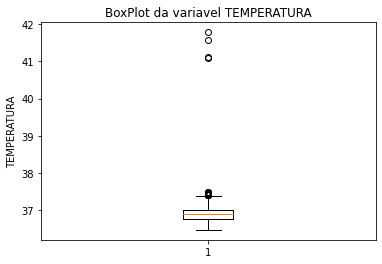

In [30]:
# Imprimindo um boxplot da temperatura 
plt.boxplot([dadosRawDFIndexDia.TEMPERATURA])
plt.ylabel("TEMPERATURA")
plt.title('BoxPlot da variavel TEMPERATURA')

Conforme boxplot, há outiliers acima de aproximadamente 37,5ºC.

Segundo os especialistas, OS PARÂMETROS MÁXIMOS (EM REPOUSO) PARA A TEMPERATURA CORPORAL SÃO OS SEGUINTES:
- 0 <= TEMPERATURA CORPORAL < 40

In [31]:
# Temperatura acima de 40
len(dadosRawDFIndexDia[(dadosRawDFIndexDia.TEMPERATURA >= 40)])

4

Como será a distribuição da TEMPERATURA em função dos DIA

<AxesSubplot:xlabel='DIA'>

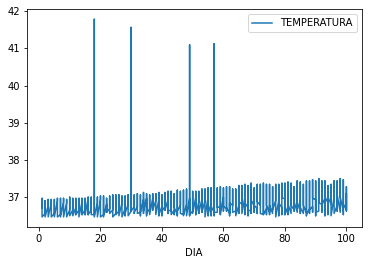

In [32]:
dadosRawDFIndexDia.plot(y='TEMPERATURA',use_index=True)

Quais os dias que ocorreram outliers de temperatura?

In [33]:
indicesOutliersTemperatura=dadosRawDFIndexDia[dadosRawDFIndexDia['TEMPERATURA']>40].index
indicesOutliersTemperatura

Float64Index([18.0, 30.0, 49.0, 57.0], dtype='float64', name='DIA')

Assim, devemos excluir os seguintes registros:

In [34]:
indicesOutliersTemperatura=dadosRawDF[dadosRawDF['TEMPERATURA']>40].index
indicesOutliersTemperatura

Int64Index([413, 701, 1168, 1356], dtype='int64')

Que tal uma visão geral das estatisticas descritivas das nossas variáveis, antes de excluir os outliers.

In [35]:
dadosRawDFIndexDia.select_dtypes(include='float16').describe()

,BATIMENTO,PRESSAO,TEMPERATURA
count,2400.0,2400.0,2400.0
mean,inf,12.2,inf
std,2.9,1.3,0.3
min,61.7,8.4,36.5
25%,68.3,11.3,36.8
50%,70.6,12.4,36.9
75%,72.3,13.2,37.0
max,101.8,21.7,41.8


A média (mean) para as variáveis BATIMENTO e TEMPERATURA deram valores infinito (inf), estranho!  
Já a mediana (50%) foi de 70,6 para o BATIMENTO e 36,9 para a TEMPERATURA.   
A PRESSAO teve média de 12,2 e mediana de 12,4, com desvio padrão de 1,3.  
Os valores máximos das três variáveis 101,8; 21,7; e 41,8 foram maiores do que os limite passado pelos especialista do dominío, assim, estes pontos devem ser excluidos da base de dados, conforme já mapeado anteriormente.   
Pesquisaremos a razão das médias do BATIMENTO e TEMPERATURA apresentarem valores infinito.

In [36]:
mediaBatimento=dadosRawDFIndexDia.BATIMENTO.mean()
mediaBatimento

inf

In [37]:
mediaTemperatura=dadosRawDFIndexDia.TEMPERATURA.mean()
mediaTemperatura

inf

In [38]:
somaBatimentos=dadosRawDFIndexDia.BATIMENTO.sum()
somaBatimentos

inf

In [39]:
somaTemperatura=dadosRawDFIndexDia.TEMPERATURA.sum()
somaTemperatura

inf

Conforme informações acima, o problema está que o somatório das variáveis BATIMENTO e TEMPERATURA estão apresentados valores infinitos, dai a média ser infinita.   
Agora a questão é por que estas variáveis estão apresentando soma infinita?

In [40]:
maxValorBatimento=dadosRawDFIndexDia.BATIMENTO.max()
maxValorBatimento

101.8

In [41]:
maxValorTemperatura=dadosRawDFIndexDia.TEMPERATURA.max()
maxValorTemperatura

41.78

Os valores máximos destas duas variáveis não são infinitos, conforme já tínhamos observado na saída do método describe().

In [42]:
dadosRawDFIndexDia.BATIMENTO.dtype

dtype('float16')

Pode ser que o tipo de dados float16 não seja suficiente para armazenar estas variáveis, vamos alterar os tipos destas de dados para float32 e verificar as alterações:

In [43]:
dadosRawDFIndexDia['BATIMENTO']=dadosRawDFIndexDia['BATIMENTO'].astype(np.float32)
dadosRawDFIndexDia['TEMPERATURA']=dadosRawDFIndexDia['TEMPERATURA'].astype(np.float32)
dadosRawDFIndexDia.dtypes

HORA             int64
BATIMENTO      float32
PRESSAO        float16
TEMPERATURA    float32
dtype: object

In [44]:
dadosRawDFIndexDia.select_dtypes(include='float32').describe()

,BATIMENTO,TEMPERATURA
count,2400.0,2400.0
mean,70.2,36.9
std,2.9,0.3
min,61.7,36.5
25%,68.3,36.8
50%,70.6,36.9
75%,72.3,37.0
max,101.8,41.8


Problema encontrado :)   
Vamos alterar o tipo das 3 variáveis para float32 em ambos dos dataframes

In [45]:
dadosRawDFIndexDia['PRESSAO']=dadosRawDFIndexDia['PRESSAO'].astype(np.float32)
dadosRawDF['BATIMENTO']=dadosRawDF['BATIMENTO'].astype(np.float32)
dadosRawDF['TEMPERATURA']=dadosRawDF['TEMPERATURA'].astype(np.float32)
dadosRawDF['PRESSAO']=dadosRawDF['PRESSAO'].astype(np.float32)
dadosRawDFIndexDia.dtypes

HORA             int64
BATIMENTO      float32
PRESSAO        float32
TEMPERATURA    float32
dtype: object

In [46]:
dadosRawDF.dtypes

HORA             int64
BATIMENTO      float32
PRESSAO        float32
TEMPERATURA    float32
DIA            float16
dtype: object

In [47]:
dadosRawDFIndexDia.select_dtypes(include='float32').describe()

,BATIMENTO,PRESSAO,TEMPERATURA
count,2400.0,2400.0,2400.0
mean,70.2,12.2,36.9
std,2.9,1.3,0.3
min,61.7,8.4,36.5
25%,68.3,11.3,36.8
50%,70.6,12.4,36.9
75%,72.3,13.2,37.0
max,101.8,21.7,41.8


In [48]:
dadosRawDF.select_dtypes(include='float32').describe()

,BATIMENTO,PRESSAO,TEMPERATURA
count,2400.0,2400.0,2400.0
mean,70.2,12.2,36.9
std,2.9,1.3,0.3
min,61.7,8.4,36.5
25%,68.3,11.3,36.8
50%,70.6,12.4,36.9
75%,72.3,13.2,37.0
max,101.8,21.7,41.8


## Excluindo os outliers

In [49]:
dadosRawDFSemOutliers=dadosRawDF.drop(indicesOutliersBatimento)

In [50]:
dadosRawDFSemOutliers=dadosRawDFSemOutliers.drop(indicesOutliersTemperatura)

In [51]:
dadosRawDFSemOutliers=dadosRawDFSemOutliers.drop(indicesOutliersPressao)

In [52]:
len(dadosRawDF)

2400

In [53]:
len(dadosRawDFSemOutliers)

2388

In [54]:
dadosRawDFSemOutliers.head(1)

,HORA,BATIMENTO,PRESSAO,TEMPERATURA,DIA
0,0,66.6,10.3,36.7,1.0


In [55]:
# Tranformando a coluna DIA no indice do dataframe 
dadosRawDFIndexDiaSemOutliers=dadosRawDFSemOutliers.set_index('DIA')

In [56]:
dadosRawDFIndexDiaSemOutliers.head(2)

,HORA,BATIMENTO,PRESSAO,TEMPERATURA
DIA,,,,
1.0,0,66.6,10.3,36.7
1.0,1,66.9,10.5,36.6


In [57]:
dadosRawDFIndexDiaSemOutliers.tail(2)

,HORA,BATIMENTO,PRESSAO,TEMPERATURA
DIA,,,,
100.0,22,67.8,11.3,37.0
100.0,23,65.8,11.3,37.1


In [58]:
len(dadosRawDFIndexDiaSemOutliers)

2388

Agora temos a estatística descritiva da nossa base de dados sem os outliers.

In [59]:
dadosRawDFIndexDiaSemOutliers.select_dtypes(include='float32').describe()

,BATIMENTO,PRESSAO,TEMPERATURA
count,2388.0,2388.0,2388.0
mean,70.1,12.2,36.9
std,2.6,1.3,0.2
min,61.7,8.4,36.5
25%,68.3,11.3,36.8
50%,70.6,12.4,36.9
75%,72.3,13.2,37.0
max,74.0,14.0,37.5


<AxesSubplot:xlabel='DIA'>

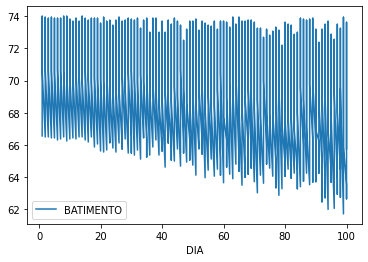

In [60]:
dadosRawDFIndexDiaSemOutliers.plot(y='BATIMENTO',use_index=True)

<AxesSubplot:xlabel='DIA'>

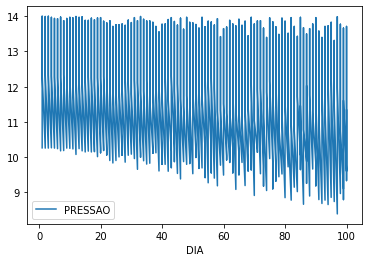

In [61]:
dadosRawDFIndexDiaSemOutliers.plot(y='PRESSAO',use_index=True)

<AxesSubplot:xlabel='DIA'>

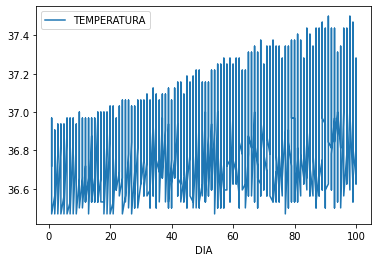

In [62]:
dadosRawDFIndexDiaSemOutliers.plot(y='TEMPERATURA',use_index=True)

Vamos verificar as médias e respectivos desvios padrão por dia

In [63]:
# Medias por dia
mediaPorDia=dadosRawDFIndexDiaSemOutliers.select_dtypes(include='float32').\
groupby(['DIA']).mean()

In [64]:
# Desvio Padrão por dia
desvioPadraoPorDia=dadosRawDFIndexDiaSemOutliers.select_dtypes(include='float32').\
groupby(['DIA']).std()

<AxesSubplot:xlabel='DIA'>

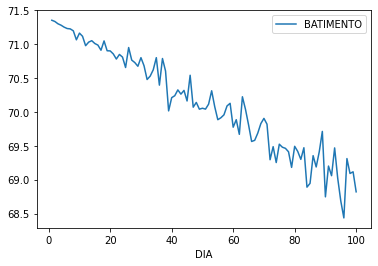

In [65]:
mediaPorDia.plot(y=['BATIMENTO'],use_index=True)

<AxesSubplot:xlabel='DIA'>

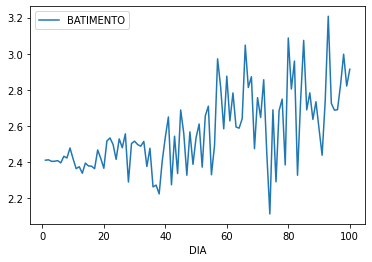

In [66]:
desvioPadraoPorDia.plot(y=['BATIMENTO'],use_index=True)

<AxesSubplot:xlabel='DIA'>

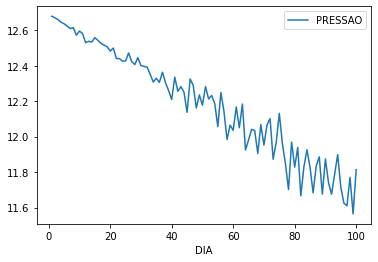

In [67]:
mediaPorDia.plot(y=['PRESSAO'],use_index=True)

<AxesSubplot:xlabel='DIA'>

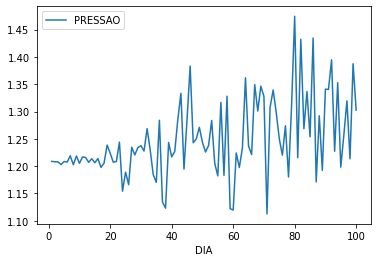

In [68]:
desvioPadraoPorDia.plot(y=['PRESSAO'],use_index=True)

<AxesSubplot:xlabel='DIA'>

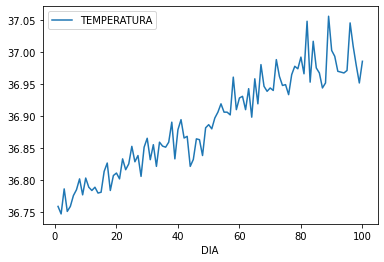

In [69]:
mediaPorDia.plot(y=['TEMPERATURA'],use_index=True)

<AxesSubplot:xlabel='DIA'>

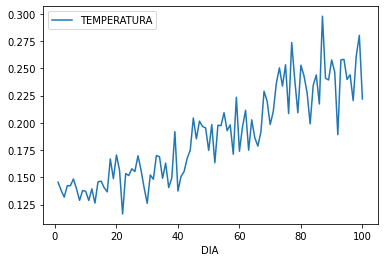

In [70]:
desvioPadraoPorDia.plot(y=['TEMPERATURA'],use_index=True)

2) CONSIDERANDO-SE QUE O PACOTE PADRÃO DE DADOS CONTEM 24 AMOSTRAS COLETADAS A CADA HORA, APLIQUE A CORRELAÇÃO, PARA CADA UM DOS PARÂMETROS (O BATIMENTO CARDÍACO, A PRESSÃO ARTERIAL E A TEMPERATURA CORPORAL), PROCURE IDENTIFICAR PADRÕES DE COMPORTAMENTOS NOS VALORES AMOSTRADOS. ATENÇÃO, É PRECISO SEGMENTAR O ARQUIVO EM PACOTES MENORES COM 24 AMOSTRA CADA, OU SEJA, DIVIDA O ARQUIVO EM PACOTES COM 24 AMOSTRA CADA E APLIQUE AS FERRAMENTAS ESTATÍSTICAS. DESENVOLVER O SOFTWARE EM PYTHON.

Uma primeira abordagem é utilizar a média diária das variável para o cálculo das correlações, ai vem a questão, será que as médias são uma boa representação da população das variáveis em questão?

Para tentar responder esta questão utilizaremos a medida estattística Coeficiente de Varuação:
> Em teoria das probabilidades e estatística, o coeficiente de variação (CV), também conhecido como desvio padrão relativo (DPR), é uma medida padronizada de dispersão de uma distribuição de probabilidade ou de uma distribuição de frequências. É frequentemente expresso como uma porcentagem, sendo definido como a razão do desvio padrão σ \sigma pela média μ \mu (ou seu valor absoluto, | μ | {\displaystyle \left\vert \mu \right\vert }).    
[Fonte](https://pt.wikipedia.org/wiki/Coeficiente_de_varia%C3%A7%C3%A3o)

In [71]:
# Calculo do coeficiente de variação
coeficienteDeVariacao=(desvioPadraoPorDia/mediaPorDia)*100

<AxesSubplot:xlabel='DIA'>

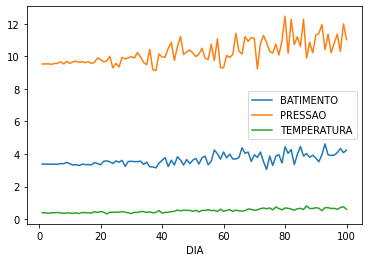

In [72]:
# Impressão do coeficiente de variação diário
coeficienteDeVariacao.plot(y=['BATIMENTO','PRESSAO','TEMPERATURA'],use_index=True)

Conforme gráfico, temperatura possue um CV menor que 1% e praticamente constante.   
Já o batimento, tem um CV por volta de 4%, contudo ele oscila um pouco mais que a temperatura.   
Por sua vez, a temperatura possui o maior CV, entre 9 e 12%.   
Desta forma, parece que a utilização das médias representam bem a população, permitindo seu uso no calculo das correlações.

In [73]:
coeficienteDeCorrelacao=mediaPorDia.corr(method='pearson')
coeficienteDeCorrelacao

,BATIMENTO,PRESSAO,TEMPERATURA
BATIMENTO,1.0,0.9,-0.9
PRESSAO,0.9,1.0,-0.9
TEMPERATURA,-0.9,-0.9,1.0


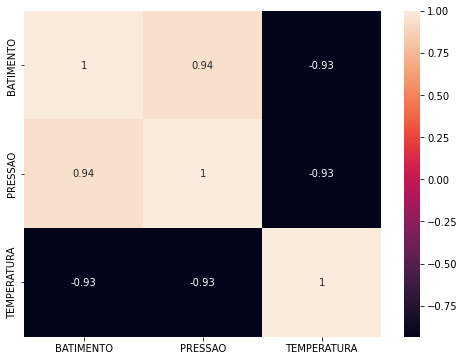

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(coeficienteDeCorrelacao, annot=True)
plt.show()

3) A CORRELAÇÃO PODE SER APLICADA INDIVIDUALMENTE PARA CADA UM DOS PARÂMETROS APRESENTADOS, CONTUDO, VOCÊ PODE APLICAR A CORRELAÇÃO EM DOIS PARÂMETROS SIMULTANEAMENTE PARA A IDENTIFICAÇÃO DE PADRÕES? POR EXEMPLO,DADO UM PERÍODO DE TEMPO, RESPEITANDO O TAMANHO DO PACOTE DE DADOS E A AMOSTRAGEM, PODE-SE UTILIZAR OS VALORES DE CORRELAÇÃO ENTRE BATIMENTOS CARDÍACOS E PRESSÃO ARTERIAL PARA COMPOR UM NOVO PADRÃO DE APRENDIZADO? AVALIE ESTA QUESTÃO - APRESENTE UMA SOLUÇÃO/RESOLUÇÃO.DESENVOLVER O SOFTWARE EM PYTHON.

Tentaremos prever a temperatura corporal em função da pressão e dos batimentos cardiacos.

In [75]:
#!pip install statsmodels 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# Variáveis preditoras (independentes) - batimentos e pressão
X=mediaPorDia.drop(['TEMPERATURA'],axis=1)
# Variável dependente - temperatura
y=mediaPorDia.drop(['BATIMENTO','PRESSAO'],axis=1)

In [76]:
modelo=LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [77]:
# Coeficiente de determinação
modelo.score(X,y)

0.8921138164245138

A interpretação da saída acima é que, em média, as variáveis preditoras PRESSAO e BATIMENTO, explicam 89,2% das variações da variável dependente TEMPERATURA.

In [78]:
# Intercepto (constante)
modelo.intercept_

array([41.607], dtype=float32)

In [79]:
# Coeficientes
modelo.coef_

array([[-0.04307932, -0.13918273]], dtype=float32)

4) DIVIDA O ARQUIVO DE DADOS, PARA CADA PARÂMETRO, EM PACOTES COM 24 AMOSTRAS, CORRESPONDENDO A UM DIA DE AMOSTRAGEM. PARA CADA PACOTE AVALIADO, PODE-SE APLICAR FERRAMENTAL ESTATÍSTICO DESCRITIVO: MÉDIA, MEDIANA, MODA, DESVIO PADRÃO E HISTOGRAMA, PARA AUXILIAR NO PROCESSO DE MINERAÇÃO DE DADOS? PARA CADA PACOTE, CALCULE: MÉDIA, MEDIANA, MODA E DESVIO PADRÃO, PROCURE ESTABELECER CRITÉRIOS PARA TOMADA DE DECISÃO, POR EXEMPLO, SE O VALOR DO BATIMENTO CARDÍACO MÉDIO E DA PRESSÃO ARTERIAL MÉDIA ESTIVEREM ACIMA DE UM DETERMINADO VALOR, APRESENTE UMA MENSAGEM DE ATENÇÃO OU UM UM ALARME DE EMERGÊNCIA. DESENVOLVER O SOFTWARE EM PYTHON.

Anteriorrmente, já foram calculados:

<AxesSubplot:title={'center':'Média dos batimentos cardiacos por dia'}, xlabel='DIA'>

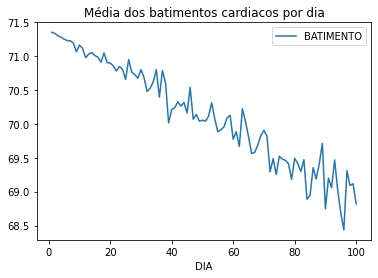

In [80]:
mediaPorDia.plot(y=['BATIMENTO'],use_index=True,title='Média dos batimentos cardiacos por dia')

<AxesSubplot:title={'center':'Média do desvio padrão dos batimentos cardiacos por dia'}, xlabel='DIA'>

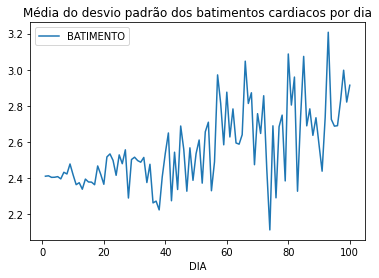

In [81]:
desvioPadraoPorDia.plot(y=['BATIMENTO'],use_index=True,title='Média do desvio padrão dos batimentos cardiacos por dia')

<AxesSubplot:title={'center':'Média da pressão arterial por dia'}, xlabel='DIA'>

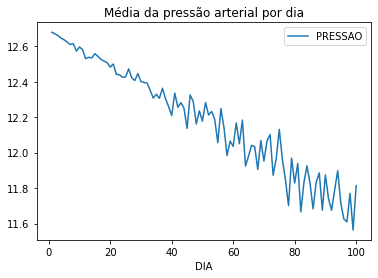

In [82]:
mediaPorDia.plot(y=['PRESSAO'],use_index=True,title='Média da pressão arterial por dia')

<AxesSubplot:title={'center':'Média do desvio padrão da pressao arterial por dia'}, xlabel='DIA'>

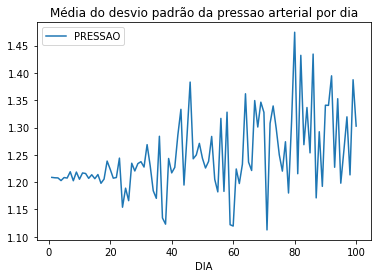

In [83]:
desvioPadraoPorDia.plot(y=['PRESSAO'],
                        use_index=True,title='Média do desvio padrão da pressao arterial por dia')

<AxesSubplot:title={'center':'Média da temperatura corporal por dia'}, xlabel='DIA'>

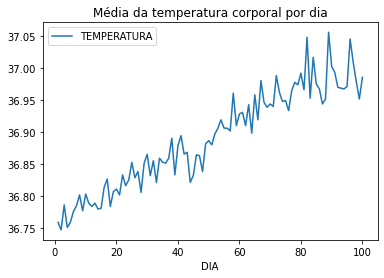

In [84]:
mediaPorDia.plot(y=['TEMPERATURA'],use_index=True,title='Média da temperatura corporal por dia')

<AxesSubplot:title={'center':'Média do desvio padrão da temperatura corporal por dia'}, xlabel='DIA'>

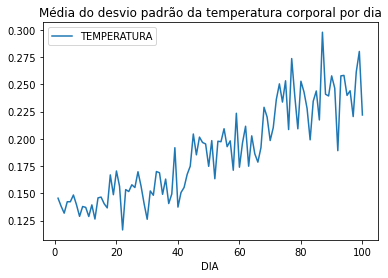

In [85]:
desvioPadraoPorDia.plot(y=['TEMPERATURA'],
                        use_index=True,title='Média do desvio padrão da temperatura corporal por dia')

Vamos agora calcular outras medidas:

In [86]:
# Mediana por dia
medianaPorDia=dadosRawDFIndexDiaSemOutliers.select_dtypes(include='float32').\
groupby(['DIA']).median()

<AxesSubplot:title={'center':'Mediana dos batimentos cardiacos por dia'}, xlabel='DIA'>

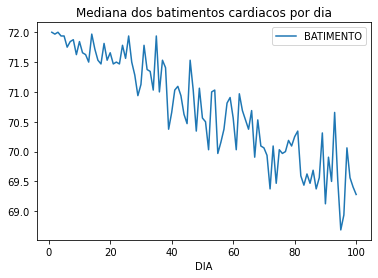

In [87]:
medianaPorDia.plot(y=['BATIMENTO'],use_index=True,title='Mediana dos batimentos cardiacos por dia')

<AxesSubplot:title={'center':'Mediana da pressao arterial por dia'}, xlabel='DIA'>

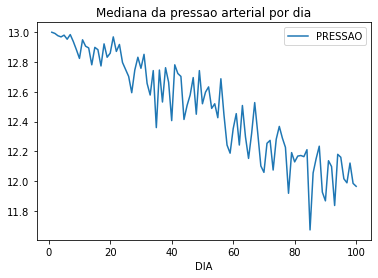

In [88]:
medianaPorDia.plot(y=['PRESSAO'],use_index=True,title='Mediana da pressao arterial por dia')

<AxesSubplot:title={'center':'Mediana da temperatura coporal por dia'}, xlabel='DIA'>

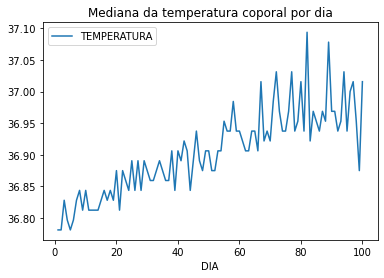

In [89]:
medianaPorDia.plot(y=['TEMPERATURA'],use_index=True,title='Mediana da temperatura coporal por dia')

In [90]:
# Moda por dia
from statistics import mode
dadosModaPorDia= dadosRawDFIndexDiaSemOutliers.groupby(['DIA'])
def calculaModa(dia,coluna):
    return mode(dadosModaPorDia.get_group(dia)[coluna])

batimento=[]
pressao=[]
temperatura=[]
for name, group in dadosModaPorDia:
    batimento.append(calculaModa(name,'BATIMENTO'))
    pressao.append(calculaModa(name,'PRESSAO'))
    temperatura.append(calculaModa(name,'TEMPERATURA'))
dia=[]
for i in range(1,101):
    dia.append(i)
    
modaPorDia=pd.DataFrame(list(zip(batimento,pressao,temperatura,dia)),columns=['BATIMENTO',
                                                                         'PRESSAO', 'TEMPERATURA','DIA'])
modaPorDia=modaPorDia.set_index('DIA')

<AxesSubplot:title={'center':'Moda dos batimentos cardiacos por dia'}, xlabel='DIA'>

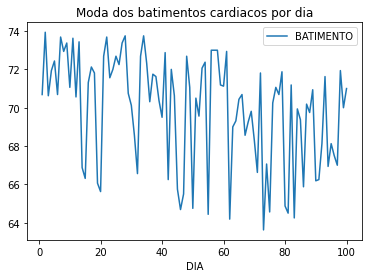

In [91]:
modaPorDia.plot(y=['BATIMENTO'],use_index=True,title='Moda dos batimentos cardiacos por dia')

PROCURE ESTABELECER CRITÉRIOS PARA TOMADA DE DECISÃO, POR EXEMPLO, SE O VALOR DO BATIMENTO CARDÍACO MÉDIO E DA PRESSÃO ARTERIAL MÉDIA ESTIVEREM ACIMA DE UM DETERMINADO VALOR, APRESENTE UMA MENSAGEM DE ATENÇÃO OU UM UM ALARME DE EMERGÊNCIA. 

Uma forma seria utilizar o modelo de predição da temperatura em função da pressão e batimentos cardiacos desenvolvido no item 3.  
Se a temperatura prevista for maior que 38ºC, a aplicação gerará um alerta.

In [143]:
medicao = {
  "BATIMENTO": [50],
  "PRESSAO": [11.8]
}

medicaoDf=pd.DataFrame(medicao)
previsao = modelo.predict(medicaoDf)
round(float(previsao),1)

37.8

In [147]:
batimento=float(input("Entre com os batimetos cardiacos: "))
pressao=float(input("Entre com a pressão arterial: "))

medicao = {
  "BATIMENTO": [batimento],
  "PRESSAO": [pressao]
}
medicaoDf=pd.DataFrame(medicao)
previsao = modelo.predict(medicaoDf)
round(float(previsao),1)
if previsao >= 40:
    print("::: Alerta!, provavelmente você está febril, procure o serviço de saúde :::")
    print("A previsão de sua temperatura é %0.2f"%(previsao))
else:
    print("A previsão de sua temperatura é %0.2f"%(previsao))

Entre com os batimetos cardiacos: 10
Entre com a pressão arterial: 4
::: Alerta!, provavelmente você está febril, procure o serviço de saúde :::
A previsão de sua temperatura é 40.62
